<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/PCA_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# PCA(It is used to reduces features by creating new uncorrelated components which keep the most important information from the original data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("/content/winequality-red(ML - Gradient Boosting datset).csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
x = df.drop("quality", axis = 1)
y = df["quality"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# explained_var: It explain how much of the dataset’s variance (information) is captured by each principal component (PC)
# cumulative_var: It runs total cumulative sum of explained variance.
# pca.explained_variance_ratio_: Fraction of variance each individual principal component explains.
# np.cumsum(explained_var): The cumulative variance explained as you keep adding PCs in order.
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
print("\nExplained Variance Ratio (per component):")
print(explained_var)
print("\nCumulative Variance Explained:")
print(cumulative_var)


Explained Variance Ratio (per component):
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]

Cumulative Variance Explained:
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


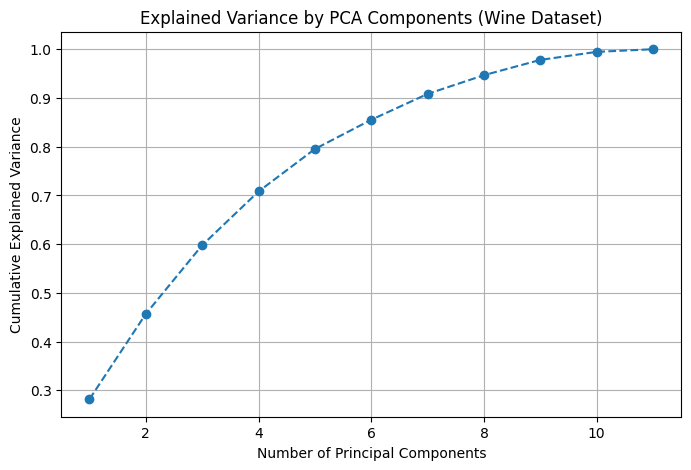

In [10]:
# len(explained_var) = number of PCs.
# +1 ensures the range includes all of them.
# range(1, len(explained_var)+1): Creates the x-axis values = [1, 2, 3, ..., number of PCs].
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components (Wine Dataset)")
plt.grid(True) # This shows the background crossing lines of the chart
plt.show()

In [ ]:
# 7. Choose top 2 components for visualization
pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x_scaled)

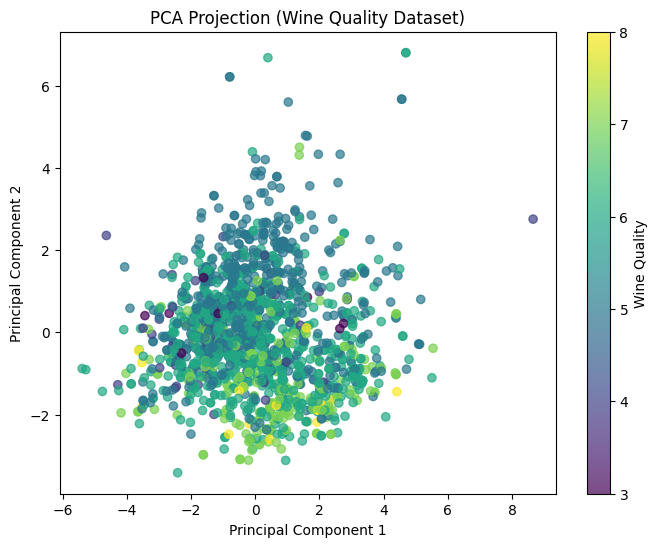

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca_2d[:,0], x_pca_2d[:,1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (Wine Quality Dataset)")
plt.colorbar(scatter, label="Wine Quality")
plt.show()